# **AM 207**: Homework 1

<div class="alert alert-info">
<strong>
Submission by Kendrick Lo (Harvard ID: 70984997) for <br>
AM 207 - Stochastic Methods for Data Analysis, Inference, and Optimization
</strong>
<br><br>
Collaboration statement: I did not collaborate with anyone.
</div>

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 
import pandas as pd

<div class="alert alert-warning">
<strong>
We decided to include common constants and functions for our simulations here.
</strong>
</div>

In [2]:
# number of samples per simulation
N_total = 10000

# number of times we repeat a simulation, to obtain measurement errors
N_sims = 1000

# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

<div class="alert alert-warning">
For any needle that is thrown, let $x$ be the shortest distance between the center of the needle and the closest floor line (i.e. $0 \le x \le \frac{t}{2}$), and $\theta$ the acute angle (i.e. $0 \le \theta \le \frac{\pi}{2}$) formed between $x$ and the needle, with the center of the needle at the vertex. Then the distance from the vertex to the closest floor line extending along the length of the needle is $a = \frac{x}{\sin(\theta)}$. It follows that if this quantity is less than or equal to one-half the needle length, then the needle must be crossing a floor line. <p>

We calculate the proportion of needles crossing a floor line in a simulation involving a total number of needles `N_total` = 10000.0 thrown.
</div>

In [3]:
def throw_needles(sample_size, dist_lines, len_needle):
    ''' 
    This function simulates the throwing of needles on the ground by sampling from a uniform
    distribution across possible ranges of values for theta and x (Buffon's Needle).

    This function returns the proportion of needles that cross a floor line.
    
    Inputs:
    sample_size: the number of sampling points to be taken for this simulation
    dist_lines: t, the distance between two adjacent floor lines
    len_needle: l, the length of each needle
    
    Returns:
    An estimate of the proportion of needles crossing a floor line.   
    '''
    
    # Sample the uniform distributions
    X = np.random.uniform(low=0, high=0.5*dist_lines, size=sample_size) 
    theta = np.random.uniform(low=0, high=0.5*np.pi, size=sample_size) 
    
    # Calculate the value of a, the distance from the center of the needle to the
    # closest line on the line extending the length of the needle
    a = X * 1.0 / np.sin(theta)
    
    # Condition: Check if a is less than one-half the needle length
    cross_line = a <= (0.5 * float(len_needle))
    
    # Count all the needles that cross
    N_cross = np.sum(cross_line)
        
    # Calculate proportion of needles crossed
    proportion_crossed = N_cross * 1.0/sample_size
    
    return proportion_crossed

<div class="alert alert-warning">
We first tested our function on one arbitrarily chosen needle length, to ensure our results make sense.
</div>

0.40 seconds to complete 1000 simulations

For needle length =  0.3
estimate of proportion =  0.1910024
error in estimate (1 std) =  0.00381249711344
95 percent confidence interval = (0.191002 +/- 0.007472)

Expected proportion =  0.19098593171


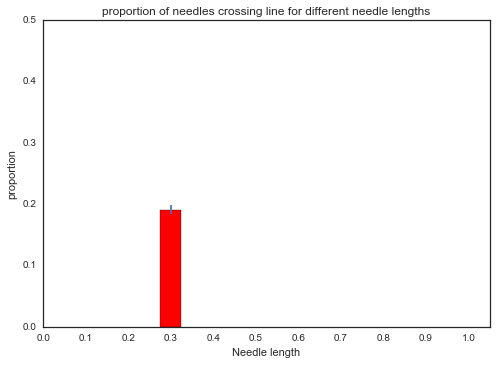

In [4]:
# length of the needle (constant for a given solution)
needle_length_l = 0.3   

# distance between floor lines (assumed constant for all simulations)
distance_betwen_tiles_t = 1

# repeat simulations to get a point estimate with error
start = time.time()

sims_array = np.empty(N_sims)
for i in xrange(N_sims):
     sims_array[i] = throw_needles(N_total, distance_betwen_tiles_t, needle_length_l)

mean_est = np.mean(sims_array)
error_est = np.std(sims_array)

timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

print "For needle length = ", needle_length_l
print "estimate of proportion = ", mean_est
print "error in estimate (1 std) = ", error_est
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est)

expected = 2.0 * needle_length_l / (np.pi * distance_betwen_tiles_t)
print "\nExpected proportion = ", expected

# bar chart showing estimates by needle length
plt.bar(needle_length_l, mean_est, width=0.05, color='r', yerr=1.96*error_est, align="center")
plt.ylabel('proportion')
plt.xlabel('Needle length')
plt.title('proportion of needles crossing line for different needle lengths')
plt.xlim(0, 1.05)
plt.ylim(0, 0.5)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

<div class="alert alert-danger">
<strong>n.b.</strong> Error bars denote a 95% confidence interval (so it can be more visible).
</div>

<div class="alert alert-warning">
We now conduct a series of simulations for the different lengths set out in the problem.
</div>


For needle length =  0.1
estimate of proportion =  0.0635182
error in estimate (1 std) =  0.00237002294504
95 percent confidence interval = (0.063518 +/- 0.004645)
Expected proportion =  0.0636619772368

For needle length =  0.2
estimate of proportion =  0.1272669
error in estimate (1 std) =  0.0032618820319
95 percent confidence interval = (0.127267 +/- 0.006393)
Expected proportion =  0.127323954474

For needle length =  0.3
estimate of proportion =  0.1910252
error in estimate (1 std) =  0.00401189044716
95 percent confidence interval = (0.191025 +/- 0.007863)
Expected proportion =  0.19098593171

For needle length =  0.4
estimate of proportion =  0.2544978
error in estimate (1 std) =  0.0043725204585
95 percent confidence interval = (0.254498 +/- 0.008570)
Expected proportion =  0.254647908947

For needle length =  0.5
estimate of proportion =  0.3182059
error in estimate (1 std) =  0.00455922528397
95 percent confidence interval = (0.318206 +/- 0.008936)
Expected proportion =  0.

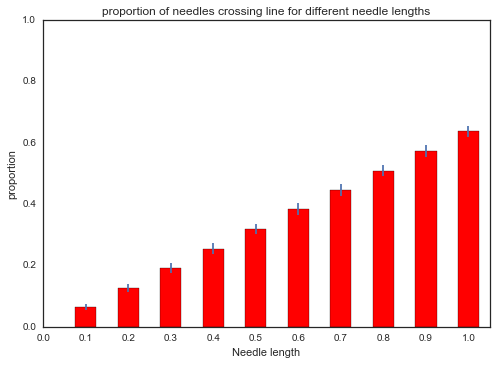

In [5]:
# length of the needle (constant for a given solution)
needle_length_l = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  

# distance between floor lines (assumed constant for all simulations)
distance_betwen_tiles_t = 1

# repeat simulations to get a point estimate with error
start = time.time()

sims_array = np.empty([len(needle_length_l), N_sims])
means = np.empty(len(needle_length_l))
errs = np.empty(len(needle_length_l))

for j, l in enumerate(needle_length_l):
    for i in xrange(N_sims):
         sims_array[j, i] = throw_needles(N_total, distance_betwen_tiles_t, l)

    mean_est = np.mean(sims_array[j])
    error_est = np.std(sims_array[j])

    print "\nFor needle length = ", l
    print "estimate of proportion = ", mean_est
    print "error in estimate (1 std) = ", error_est
    print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est)
    
    expected = 2.0 * l / (np.pi * distance_betwen_tiles_t)
    print "Expected proportion = ", expected
    
    means[j] = mean_est
    errs[j] = 1.96 * error_est

timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

# bar chart showing estimates by needle length
plt.bar(needle_length_l, means, width=0.05, color='r', yerr=1.96*errs, align="center")
plt.ylabel('proportion')
plt.xlabel('Needle length')
plt.title('proportion of needles crossing line for different needle lengths')
plt.xlim(0, 1.05)
plt.ylim(0, 1.0)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

<div class="alert alert-warning">
The simulated results match the theoretical results closely.  The expected proportion appears to fall within the computed 95% confidence interval. <p>
We now repeat the simulation with needle lengths up to 2.0, and assume that the same theoretical formulation applies when calculating the expected proportion (which we shall see no longer applies).
</div>


For needle length =  1.1
estimate of proportion =  0.6819534
error in estimate (1 std) =  0.00473355980632
95 percent confidence interval = (0.681953 +/- 0.009278)
Expected proportion =  0.700281749604

For needle length =  1.2
estimate of proportion =  0.7145717
error in estimate (1 std) =  0.00433981440963
95 percent confidence interval = (0.714572 +/- 0.008506)
Expected proportion =  0.763943726841

For needle length =  1.3
estimate of proportion =  0.7400677
error in estimate (1 std) =  0.00444268462869
95 percent confidence interval = (0.740068 +/- 0.008708)
Expected proportion =  0.827605704078

For needle length =  1.4
estimate of proportion =  0.7609761
error in estimate (1 std) =  0.0043003068251
95 percent confidence interval = (0.760976 +/- 0.008429)
Expected proportion =  0.891267681315

For needle length =  1.5
estimate of proportion =  0.7785645
error in estimate (1 std) =  0.0042635982163
95 percent confidence interval = (0.778564 +/- 0.008357)
Expected proportion =  0.

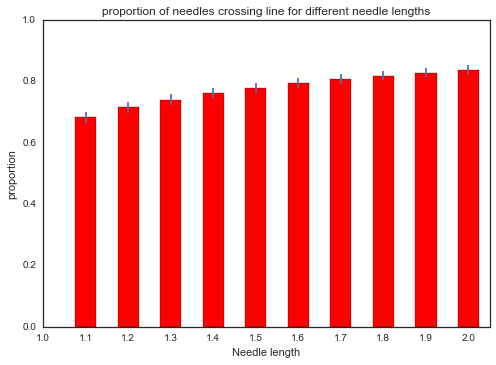

In [6]:
# length of the needle (constant for a given solution)
needle_length_l = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]  

# distance between floor lines (assumed constant for all simulations)
distance_betwen_tiles_t = 1

# repeat simulations to get a point estimate with error
start = time.time()

sims_array = np.empty([len(needle_length_l), N_sims])
means = np.empty(len(needle_length_l))
errs = np.empty(len(needle_length_l))

for j, l in enumerate(needle_length_l):
    for i in xrange(N_sims):
         sims_array[j, i] = throw_needles(N_total, distance_betwen_tiles_t, l)

    mean_est = np.mean(sims_array[j])
    error_est = np.std(sims_array[j])

    print "\nFor needle length = ", l
    print "estimate of proportion = ", mean_est
    print "error in estimate (1 std) = ", error_est
    print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est)
    
    expected = 2.0 * l / (np.pi * distance_betwen_tiles_t)
    print "Expected proportion = ", expected
    
    means[j] = mean_est
    errs[j] = 1.96 * error_est

timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

# bar chart showing estimates by needle length
plt.bar(needle_length_l, means, width=0.05, color='r', yerr=1.96*errs, align="center")
plt.ylabel('proportion')
plt.xlabel('Needle length')
plt.title('proportion of needles crossing line for different needle lengths')
plt.xlim(1, 2.05)
plt.ylim(0, 1.0)
plt.xticks(np.arange(1.0, 2.1, 0.1))
plt.show()

<div class="alert alert-warning">
Not only do the expected proportions deviate from the estimated values, applying the formula given suggests the probability can be greater than one -- which is nonsensical. As seen from the histogram, it makes more sense that as the needles get longer, the proportion gradually increases, but plateauing approaching one. <br> <br>

We need to correct the analytical formula. The integral that was solved to obtain the solution for needles of length shorter than the distance between two floor lines was: 

$$ 
\int_{\theta=0}^{\frac{\pi}{2}}  \int_{x=0}^{\frac{l}{2}\sin\theta} \frac{4}{t\pi} \,dx \,d\theta 
$$
<p>

and we are integrating the join probability distribution function over values of x and $\theta$. When the needle is sufficiently short (in this case, the needle is short enough to be completely horizontal or vertical), the maximum distance between the center of the needle can be any value less than $\frac{l}{2}\sin\theta$ over the possible values of theta. However, when the needle is longer, it is not short enough to be completely horizontal without crossing a floor line. <br> <br>

In the previously derived formula, there is no bound on $x$ and it can grow proportionally to l, which makes no sense. In fact, $x$ cannot represent a length greater than one-half the distance between floor lines; if the distance is greater than this, then the center of the needle is actually closer to an adjacent line (which has a smaller associate $x$). Accordingly, this second condition on $x$ must be accounted for, and the analytical solution is the solution given by the following integral:

$$ 
\int_{\theta=0}^{\frac{\pi}{2}}  \int_{x=0}^{min(\frac{l}{2}\sin\theta, \frac{t}{2})} \frac{4}{t\pi} \,dx \,d\theta 
$$
</div>

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


In [7]:
def estimate_integral_MC(function_to_integrate, lower_bound=0, upper_bound=1, 
                             number_of_samples=10000, number_of_tries=1000):
    '''
    This function evaluates the value of an integral by simulation, and returns a point estimate
    and an error estimate.
    
    Each simulation involves the taking of 'number_of_samples' samples, and this simulation is 
    then repeated 'number_of_tries' times.
    
    We set some arbitrary default values for a number of arguments, but these can be set as required.
    
    Inputs:
    function_to_integrate: a function of x
    lower_bound, upper_bound: limits of integration
    number_of_samples: the number of sampling points to be taken per simulation
    number_of_tries: the number of independent simulations
    
    Returns:
    An estimate of the integral of the function, with associated error.
    '''
    
    sims_array = np.empty(number_of_tries)  # store estimates by simulation
 
    for i in xrange(number_of_tries):
    
        # Draw from a uniform distribution with the given bounds
        X = np.random.uniform(low=lower_bound, high=upper_bound, size=number_of_samples) 

        # Evaluate the integrand
        Y = function_to_integrate(X)

        # Compute the average value of the function
        f_average = np.sum(Y) * 1.0 / number_of_samples

        # Estimate the value of the integral, applying mean value theorem
        estimate = (b - a) * f_average
    
        # Store estimate for this simulation in array
        sims_array[i] = estimate

    mean_est = np.mean(sims_array)
    error_est = np.std(sims_array)
    
    return mean_est, error_est 

In [8]:
# We define the function f(x) for which we want to evaluate the integral
def f(x):
    return x**((x*1.0)/4.0)

# and the anti-derivative for testing, if available
def anti_derivative_f(x): 
    # not implemented
    pass
    return

In [9]:
print 'number of samples per simulation, N_total: %d' % (N_total)
print 'number of simulations performed, N_sims:  %d' % (N_sims)

number of samples per simulation, N_total: 10000
number of simulations performed, N_sims:  1000


In [10]:
# upper and lower limits
a = 0   
b = 3 

start = time.time()
estimate, error = estimate_integral_MC(f, lower_bound=a, upper_bound=b, 
                                       number_of_samples=N_total, number_of_tries=N_sims)
timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

print "Monte Carlo estimate = ", estimate
print "error in estimate (1 std) = ", error
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (estimate, 1.96 * error)

0.39 seconds to complete 1000 simulations

Monte Carlo estimate =  3.91546380085
error in estimate (1 std) =  0.0118714981161
95 percent confidence interval = (3.915464 +/- 0.023268)


<div class="alert alert-warning">
We evaluate a 95% confidence for the value of the first integral $ \int_0^3 x^{\frac{x}{4}} \,dx$ to be (3.9155 +/- 0.0232).
</div>

In [11]:
# We define the function g(x) for which we want to evaluate the integral
def g(x):
    return np.log(x) * np.log(1-x)

In [12]:
# upper and lower limits
a = 0   
b = 1 

start = time.time()
estimate, error = estimate_integral_MC(g, lower_bound=0, upper_bound=1, 
                                       number_of_samples=N_total, number_of_tries=N_sims)
timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

print "Monte Carlo estimate = ", estimate
print "error in estimate (1 std) = ", error
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (estimate, 1.96 * error)

0.31 seconds to complete 1000 simulations

Monte Carlo estimate =  0.354972571235
error in estimate (1 std) =  0.0012475772208
95 percent confidence interval = (0.354973 +/- 0.002445)


<div class="alert alert-warning">
We evaluate a 95% confidence for the value of the second integral $ \int_0^1 \log x \cdot \log(1-x) \,dx $ to be (0.3550 +/- 0.0024).
</div>

# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




<div class="alert alert-info">
References: <p>
https://en.wikipedia.org/wiki/Torus <br>
http://cobalt.rocky.edu/~ulrich.hoensch/FS_2012/MAT275/Lecture%20Notes/Lecture%2015_7%20Triple%20Integrals%20in%20Cylindrical%20and%20Spherical%20Coordinates.pdf
</div>

<div class="alert alert-warning">
Our approach is to estimate the volume of the interior of the whole torus by using the equation given for the weight, when density is assumed to be 1. Subsequently, we calculate the volume of the remaining part with the piece cut off, and calculate the requested percentage. <br><br>

First, if the distance to the outer surface of the torus from the origin is $R = 4$, and the distance to the inner surface of the torus from the origin is $r = 2$, then the distance from the origin to the center of the tube is $c = \frac{(R - r)}{2} + r = 3$, and the radius of the tube with circular cross-section is $a = \frac{R - r}{2} = 1$, under the assumption that $R > r$. Therefore, points within the torus volume satisfy the following inequality: <br><br>

$$z^2 + (\sqrt{x^2 + y^2} - 3)^2 \leq 1$$ <br><br>

We will draw a three-dimensional "box" that encloses this torus with x and y ranges spanning $(-R, R) = (-4, 4)$, and  $(-a, a) = (-1, 1)$, which will enclose the entire torus. We will count the number of points that fall within the torus interior, and compare it to the total number of points sampled within the box: the proportion of total points within the box that are enclosed in the torus is an estimate of the proportion of the total volume of the box taken up by the volume of the torus.
</div>

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# We define the inequality that defines points within the torus volume
def f(x, y, z, a, c):
    return (z**2 + (np.sqrt(x**2 + y**2) - c)**2) <= a

In [15]:
def estimate_torus_volume_MC(in_torus, inner_radius, outer_radius, 
                             x_low, x_high, y_low, y_high, z_low, z_high,
                             number_of_samples=10000, number_of_tries=1000):
    '''
    This function evaluates the value of a torus volume by simulation, by sampling points within
    an enclosing 3-D box with default dimensions of 2R X 2R X 2a, where R is the outer radius of the
    torus, and 'a' is the radius of the circular cross-section. The proportion of points that lie 
    within the 3D torus is estimated to be the same as the proportion of the box volume occupied by the torus.
    
    Each simulation involves the taking of 'number_of_samples' samples, and this simulation is 
    then repeated 'number_of_tries' times.
    
    We set some arbitrary default values for a number of arguments, but these can be set as required.
    
    Inputs:
    in_torus: the inequality that defines points within the torus volume
    inner_radius: r, the distance from the origin to the inside of the torus
    outer_radius: R, the distance from the origin to the outside of the torus
    x_low, x_high, y_low, y_high, z_low, z_high: the bounds of the enclosing box
    number_of_samples: the number of sampling points to be taken per simulation
    number_of_tries: the number of independent simulations
    
    Returns:
    An estimate of the torus volume, with associated error.
    '''
   
    sims_array = np.empty(number_of_tries)  # store estimates by simulation
    
    a = (outer_radius - inner_radius) * 0.5  # radius of tube
    c = (outer_radius - inner_radius) * 0.5 + inner_radius  # distance to center of tube
    
    for i in xrange(number_of_tries):
    
        # Draw from uniform distributions with the given bounds
        X = np.random.uniform(low=x_low, high=x_high, size=number_of_samples) 
        Y = np.random.uniform(low=y_low, high=y_high, size=number_of_samples)
        Z = np.random.uniform(low=z_low, high=z_high, size=number_of_samples)

        # Check if point is inside the torus
        is_point_inside = in_torus(X, Y, Z, a, c)

        # Count the hits inside the torus
        N_inside = sum(is_point_inside)
        
        # estimate the torus volume
        cube_volume = (x_high - x_low) * (y_high - y_low) * (z_high - z_low)
        torus_volume = cube_volume * (N_inside*1.0)/number_of_samples

        if number_of_tries==1:
            # plot to assist in visualization
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X, Y, Z, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)
            ax.set_xlabel('X axis')
            ax.set_ylabel('Y axis')
            ax.set_zlabel('Z axis')
            ax.set_title('plot for test run \n(height of box increased for visibility)')
            plt.show()
        
        # Store estimate for this simulation in array
        sims_array[i] = torus_volume

    mean_est = np.mean(sims_array)
    error_est = np.std(sims_array)
    
    return mean_est, error_est 

In [16]:
small_r = 2  # inner radius
big_r = 4 # outer radius
a = (big_r - small_r)*0.5 # radius of tube
c = (big_r - small_r)*0.5 + small_r # distance to tube center

In [17]:
print 'number of samples per simulation, N_total: %d' % (N_total)
print 'number of simulations performed, N_sims:  %d' % (N_sims)

number of samples per simulation, N_total: 10000
number of simulations performed, N_sims:  1000


<div class="alert alert-warning">
We ran one test to obtain a point estimate, to allow us to check our algorithm. We sampled from a taller volume for this test to allow us to get a better visual of the torus shape.
</div>

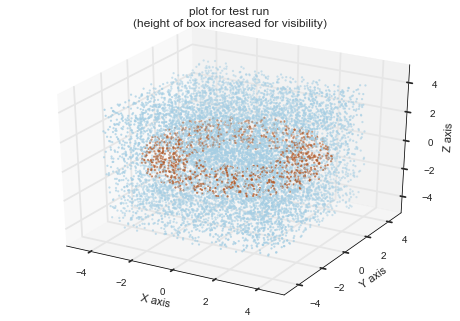

0.97 seconds to complete test simulation
point estimate =  59.648
expected value =  59.2176264065


In [18]:
start = time.time()
estimate, error = estimate_torus_volume_MC(f, small_r, big_r, 
                                           -big_r, big_r, -big_r, big_r, -a*4, a*4,
                                              number_of_samples=N_total, number_of_tries=1)
timer = time.time() - start
print '%0.2f seconds to complete test simulation' % timer

print "point estimate = ", estimate
print "expected value = ", 2 * np.pi**2 * a**2 * c

<div class="alert alert-warning">
The estimate is in the same ball park, but we need to repeat this simulation many times so that we can get a better estimate (along with an estimate of the error). We ran a full simulation to compute the volume of the torus, and to provide an estimate of the error. We adjusted the range of $z$-values back to $(-a, a)$ to minimize the number of samples taken outside of the torus. 
</div>

In [19]:
start = time.time()
estimate, error = estimate_torus_volume_MC(f, small_r, big_r, 
                                           -big_r, big_r, -big_r, big_r, -a, a,
                                              number_of_samples=N_total, number_of_tries=N_sims)
timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

print "Monte Carlo estimate = ", estimate
print "error in estimate (1 std) = ", error
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (estimate, 1.96 * error)

12.45 seconds to complete 1000 simulations

Monte Carlo estimate =  59.2296192
error in estimate (1 std) =  0.63082153187
95 percent confidence interval = (59.229619 +/- 1.236410)


<div class="alert alert-warning">
We are now told that our roommate has cut off a piece of the "donut" represented by the torus. The cuts were first parallel to the $x$ axis at $y = -3$, and then parallel to the $y$ axis at $x = 1$. <br><br>

The first cut suggests that any part of the torus with a $y$-coordinate less than or equal to -3 is no longer part of the torus volume, noting that the cut being parallel to the $x$-axis means the cut spans all values of $x$, as well as all values of $z$ for the torus. <br><br>

The second cut suggests that any part of the torus with an $x$-coordinate greater than or equal to 1 (n.b. this assumes the roommate left you with the larger piece from the remaining section) is no longer part of the torus volume; the cut being parallel to the $y$-axis means the cut spans all values of $y$, as well as all value of $z$ for the torus. <br><br>

Through simulation, this is a straightforward question to answer as we simply treat points that satisfy $y \le 3$ and $x \ge 1$ as being outside of the torus. Put another way, rather than relying only on the inequality given, we also apply these two additional conditions when determining if a point is in or out of the torus.
</div>

In [20]:
# We define a special function that also check the conditions that define points within the (remaining) torus volume
def roommate_f(x, y, z, a, c):
    # roommates leave y>-3 and x<1 pieces only
    return ((z**2 + (np.sqrt(x**2 + y**2) - c)**2) <= a) & (y > -3) & (x < 1)

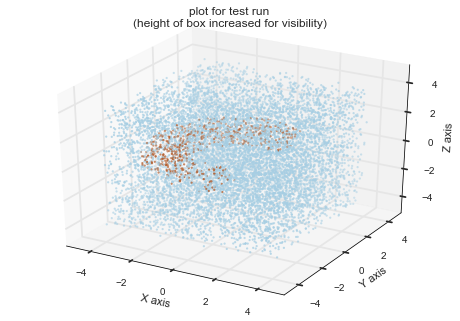

0.90 seconds to complete test simulation
point estimate =  32.7168


In [21]:
# Just a test, to get an approximation and a picture (make sure it is consistent with what we expect)
start = time.time()
estimate, error = estimate_torus_volume_MC(roommate_f, small_r, big_r, 
                                           -big_r, big_r, -big_r, big_r, -a*4, a*4,
                                              number_of_samples=N_total, number_of_tries=1)
timer = time.time() - start
print '%0.2f seconds to complete test simulation' % timer
print "point estimate = ", estimate

In [22]:
start = time.time()
estimate, error = estimate_torus_volume_MC(roommate_f, small_r, big_r, 
                                           -big_r, big_r, -big_r, big_r, -a, a,
                                              number_of_samples=N_total, number_of_tries=N_sims)
timer = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer, N_sims)

print "Monte Carlo estimate = ", estimate
print "error in estimate (1 std) = ", error
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (estimate, 1.96 * error)

12.23 seconds to complete 1000 simulations

Monte Carlo estimate =  31.9771136
error in estimate (1 std) =  0.579776852155
95 percent confidence interval = (31.977114 +/- 1.136363)


<div class="alert alert-warning">
The above is for the volume of the remaining piece (or the mass, assuming density=1). <br><br>

We now calculate the percentage of the original donut remaining:
</div>

In [23]:
perc_estimate = (estimate / (2 * np.pi**2 * a**2 * c))*100
error_perc_estimate = (error / (2 * np.pi**2 * a**2 * c))*100
print "Estimate of percentage of donut left = ", perc_estimate
print "error in estimate of percentage (1 std) = ", error_perc_estimate
print "95 percent confidence interval = (%0.2f +/- %0.2f)" % (perc_estimate, 1.96 * error_perc_estimate)

Estimate of percentage of donut left =  53.999316657
error in estimate of percentage (1 std) =  0.979061281813
95 percent confidence interval = (54.00 +/- 1.92)


<div class="alert alert-warning">
<strong> He left you with approximately 54% of the original donut</strong> (95% confidence interval is (54.00% +/- 1.92%)).
</div>

# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

### Plot the given distribution and compute the normalization factor

<div class="alert alert-warning">
We are given that: <br>
$$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 \,, t \in N $$<br> and 0 otherwise. We first calculate the normalization constant, such that all the probabilities sum to 1, i.e.: <br>
$$\sum_{t=1}^{12}\lambda \frac{t-0.9}{(t-1)^2+1} = \lambda \sum_{t=1}^{12} \frac{t-0.9}{(t-1)^2+1} = 1$$ <br>
since we've assumed $\lambda$ is not a function of t.
</div>

In [24]:
counter = 0
for t in range(1, 13, 1):
    counter += (t - 0.9)/((t - 1.0)**2 + 1)

lambda_const = 1.0 / counter
print "The normalization factor is = ", lambda_const

The normalization factor is =  0.39203851592


<div class="alert alert-warning">
The normalization factor is 0.39204. <br><br>

This comes from the formula and is not derived by simulation (therefore we did not provide an error estimate).
</div>

In [25]:
def P(t):
    return lambda_const * (t - 0.9)/((t - 1.0)**2 + 1)

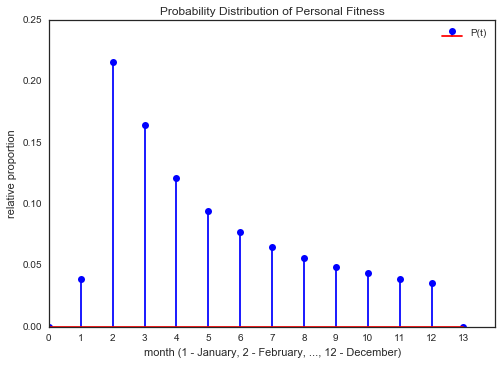

In [26]:
Y = np.zeros(14)  # add one bin on either side
for t in range(1, 13, 1):
    Y[t] = P(t)

plt.stem(Y, linefmt='b-', markerfmt='bo', basefmt='r-', label="P(t)")
plt.title("Probability Distribution of Personal Fitness")
plt.xlabel("month (1 - January, 2 - February, ..., 12 - December)")
plt.ylabel("relative proportion")
plt.xticks(range(14))
plt.legend(loc="best");

### Sample $10^5$ samples from the distribution using rejection sampling

In [27]:
# Reference: Lecture Notes

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 13 # the upper limit of our domain (exclusive)

# range limit (supremum) for y
ymax = 0.25  # determined from inspection of the above plot

N = 10**5 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

start = time.time()
# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax)
    x = np.random.randint(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0, ymax)
    
    # Do the accept/reject comparison
    if y < P(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
timer = time.time() - start
print '%0.2f seconds to take %d samples\n' % (timer, N)

print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted

0.47 seconds to take 100000 samples

Total samples drawn:  300313
Number of accepted samples:  100000


### Plot the histogram of the simulated samples and compare it to the true distribution

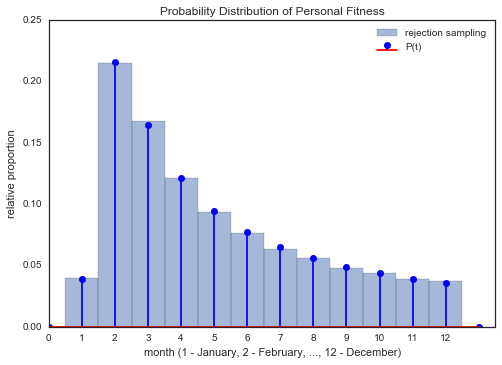

In [28]:
# plot the histogram
plt.hist(samples, bins=range(14), label=u'rejection sampling', alpha=0.5, normed=True, align="left");
plt.xticks(range(13))
plt.xlim(0, 13.5)
plt.stem(Y, linefmt='b-', markerfmt='bo', basefmt='r-', label="P(t)")
plt.title("Probability Distribution of Personal Fitness")
plt.xlabel("month (1 - January, 2 - February, ..., 12 - December)")
plt.ylabel("relative proportion")
plt.legend(loc="best");

<div class="alert alert-warning">
There is good correspondence between the distribution generated from the rejection sampling distribution and the actual distribution, although we note that the $10^5$ samples we obtained for the distribution are but about <strong>two-thirds</strong> of the total number of attempts made. The rejection sampling technique was simple, but quite inefficient. We also were able to determine what the maximum value (supremum) was through our plot in the first part of the question, but we may generally not always know this.
</div>

### Repeat the first two steps using the inverse transform

<div class="alert alert-warning">
Consider a non-negative discrete random variable X with probability mass function (pmf) p(t) = P(X = t), k ≥ 0. In this case, the construction $X = F^{-1}(U)$, where $U \sim unif(0,1)$, is explicitly given by:<br>

$$ 
\begin{aligned}
X &= 0\,\, if\, U <= p(0) \\
X &= t\,\, if\, U > \sum_{i=0}^{t-1}p(i)\,\, and\,\, U \le \sum_{i=0}^{t}p(i),\, t \ge 1. \\
\end{aligned}
$$ <br>

This is known as the <strong>discrete inverse transform method</strong>. <br>(References: https://en.wikipedia.org/wiki/Inverse_transform_sampling, http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf). <br><br>

The idea is that we can sample from the uniform distribution, and get values from a cumulative distribution function (which for our discrete distribution is simply calculated as the sum of the individual probabilities for the points of our distribution); from there, we can get values for our original distribution by inverting the cumulative distribution function. Put another way, after we draw a value $u$ from the uniform distribution, we compute $t$ such that $F(t) = u$. We can then treat $t$ as having been a random number drawn from the original distribution $p$.
</div>

In [29]:
# store the values at each t representing the cumulative probabilities up to and including t
cdf_values = np.zeros(13)
counter = 0.0
for t in range(1, 13, 1):
    cdf_values[t] = P(t) + counter
    counter = cdf_values[t]

cdf_values

array([ 0.        ,  0.03920385,  0.25482504,  0.41948121,  0.54101315,
        0.63556362,  0.71246348,  0.77709686,  0.83276633,  0.88162036,
        0.92512707,  0.96433092,  1.        ])

In [30]:
def get_X(F_array, u_val):
    # take in the array of cdf values and return the value of X given value from uniform distribution
    assert (u_val>=0) and (u_val<=1)
    for t in range(len(F_array)):
        if ((u_val > F_array[t-1]) and (u_val <= F_array[t])):
            return t

In [31]:
N = 10**5 # the total of samples we wish to generate

# generate sample from uniform distribution
U = np.random.uniform(0, 1, size=N)

start = time.time()
# determine each X from the CDF values
X = np.zeros(N)
for i in xrange(N):
    X[i] = get_X(cdf_values, U[i])

timer = time.time() - start

print '%0.2f seconds to take %d samples\n' % (timer, N)

0.27 seconds to take 100000 samples



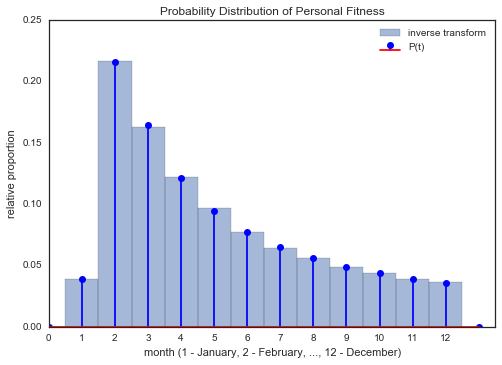

In [32]:
# plot the histogram
plt.hist(X, bins=range(14), label=u'inverse transform', alpha=0.5, normed=True, align="left");
plt.xticks(range(13))
plt.xlim(0, 13.5)
plt.stem(Y, linefmt='b-', markerfmt='bo', basefmt='r-', label="P(t)")
plt.title("Probability Distribution of Personal Fitness")
plt.xlabel("month (1 - January, 2 - February, ..., 12 - December)")
plt.ylabel("relative proportion")
plt.legend(loc="best");

<div class="alert alert-warning">
We get a result consistent with that obtained earlier.
</div>

### Compare the execution time of both methods

Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

<div class="alert alert-warning">
Assuming we have not used a particular inefficient implementation of the rejection sampling case, it seems that the inverse transform method is faster. This is not surprising since we do not "waste" any samples on points that are not within the distribution of interest, and the benefits are most apparent when the "box" contains large low density regions. <br><br>
Also, if the analytical solution to the anti-derivative was readily derivable we could use it and save time in evaluation, but in some cases it is simpler to look up values, which was particularly the situation in our example where we used a CDF derived from a probability mass function of general form.
</div>

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1$

$g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$

$f(x,y) = \max(g_1(x,y), 0) + \max(g_2(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

### Exploring the function

In [33]:
# We define the function we will be evaluating
def f(x, y):
    
    def g1(x, y):
        return -1.0 * (x + 0.4)**2 - (y + 0.4)**2 + 0.1

    def g2(x, y):
        return -1.0 * (x - 0.4)**2 - (y - 0.4)**2 + 0.05
    
    return np.maximum(g1(x, y), 0.0) + np.maximum(g2(x, y), 0.0)  # element-wise maximum

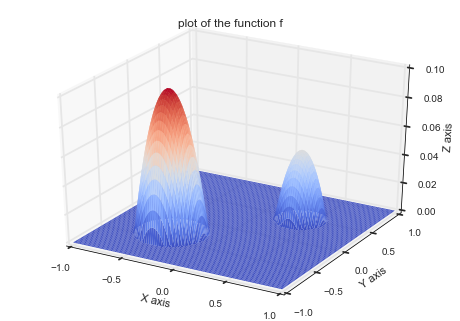

In [34]:
# plot the function being integrated to assist in visualization
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)  # create grid of X, Y values
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.coolwarm)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('plot of the function f')
plt.show()

<div class="alert alert-warning">
We note all $z$-values are greater or equal to zero. The double integral represents the volume enclosed by the two projections (essentially the tips of two paraboloids), bounded by the $x-y$ plane from below.
</div>

### Basic Monte Carlo

<div class="alert alert-warning">
By sampling uniformly over the range of $x$ and the range of $y$, we are effectively taking samples over the $x-y$ domain represented by a square, and evaluating the function at each of the sampled points. We average these values and normalize over the value of the volume to obtain our estimate.
</div>

In [35]:
print 'number of samples per simulation, N_total: %d' % (N_total)
print 'number of simulations performed, N_sims:  %d' % (N_sims)

number of samples per simulation, N_total: 10000
number of simulations performed, N_sims:  1000


In [36]:
def calculate_f_avg(func, xmin, xmax, ymin, ymax, number_of_samples):
    # calculates the average of a two-dimensional function within given limits by sampling
    
    # Draw from uniform distributions with the given bounds
    X = np.random.uniform(low=xmin, high=xmax, size=number_of_samples) 
    Y = np.random.uniform(low=ymin, high=ymax, size=number_of_samples)
    
    # Evaluate the integrand
    Z = func(X, Y)
    
    # Compute the average value of the function
    f_average = np.sum(Z) * 1.0 / number_of_samples
    
    # Estimate the value of the integral, applying mean value theorem
    # (i.e. we normalize over the value of the volume)
    return f_average

In [37]:
sims_array = np.empty(N_sims)  # store estimates by simulation

# domain limits
x_low = -1
x_high = 1 
y_low = -1
y_high = 1

start = time.time()

for i in xrange(N_sims):
    # Get estimate for function average by drawing N_total samples uniformly over whole domain of integration
    # Evaluate integral by normalizing final estimate over volume, and store the simulation result
    f_avg = calculate_f_avg(f, x_low, x_high, y_low, y_high, N_total)
    sims_array[i] = (x_high - x_low) * (y_high - y_low) * f_avg  # normalize over volume

mean_est = np.mean(sims_array)
error_est_1 = np.std(sims_array)
    
timer1 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer1, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f", error_est_1
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_1)

0.40 seconds to complete 1000 simulations

Monte Carlo estimate =  0.0195881409471
error in estimate (1 std) = %0.6f 0.000659056285561
95 percent confidence interval = (0.019588 +/- 0.001292)


### Stratified Sampling

<div class="alert alert-warning">
Rather than attempting to sample uniformly over the range of $x$ and the range of $y$, which may or may not be effective since there can be a clumping of points outside regions of interest just by chance, we divide the domain into a number of "strata", and sample uniformly within each strata. We can compute the average within each stratum and then compute the overall average for use in estimating the value of the integral. <br><br>

For the time being, we distribute the strata evenly across the $x-y$ domain but this is not a requirement. <br><br>

In this two-dimensional case, the "strata" are effectively small squares in the $x-y$ domain.
</div>

In [38]:
print 'number of samples per simulation, N_total: %d' % (N_total)
print 'number of simulations performed, N_sims:  %d' % (N_sims)

number of samples per simulation, N_total: 10000
number of simulations performed, N_sims:  1000


In [39]:
sims_array2 = np.empty(N_sims)  # store estimates of simulation

# number of squares
d = 10  # number of divisions on each axis
M = d * d

# domain limits
x_low = -1 
x_high = 1 
y_low = -1
y_high = 1

# division boundaries for each square
x_steps = np.linspace(x_low, x_high, d+1)
y_steps = np.linspace(y_low, y_high, d+1)
    
start = time.time()

for i in xrange(N_sims):
    # Divide domain of integration into M squares
    # Get estimate of function mean by drawing N_total/M samples uniformly over each square
    # Average the estimates of function means over all squares to obtain a final estimate
    # Evaluate integral by normalizing final estimate over volume, and store the simulation result
    f_avgs = np.zeros([d, d])
    for x_i in range(d):
        for y_i in range(d):
            f_avgs[x_i, y_i] = calculate_f_avg(f,x_steps[x_i], x_steps[x_i + 1],
                                                 y_steps[y_i], y_steps[y_i + 1],
                                                 N_total/M)
    overall_favg = np.mean(f_avgs) 
    sims_array2[i] = (x_high - x_low) * (y_high - y_low) * overall_favg  # normalize over volume

mean_est = np.mean(sims_array2)
error_est_2 = np.std(sims_array2)
    
timer2 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer2, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f", error_est_2
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_2)

2.79 seconds to complete 1000 simulations

Monte Carlo estimate =  0.0196351328827
error in estimate (1 std) = %0.6f 0.000259253214078
95 percent confidence interval = (0.019635 +/- 0.000508)


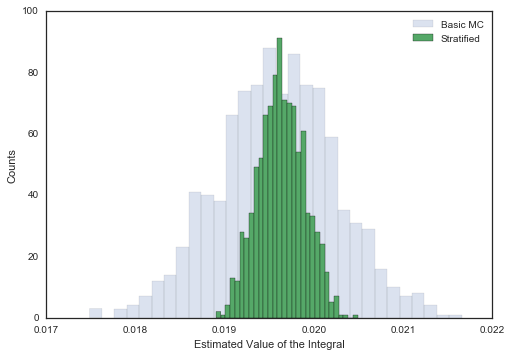

std dev of vanilla monte carlo:  0.000659056285561
std dev with stratification:  0.000259253214078


In [40]:
# visualize the improvement
plt.hist(sims_array, 30, alpha=0.2, label=u'Basic MC');
plt.hist(sims_array2, 30, label = u'Stratified');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

print "std dev of vanilla monte carlo: ", np.std(sims_array)
print "std dev with stratification: ", np.std(sims_array2)

<div class="alert alert-warning">
We note that the error rate has decreased by using stratified sampling. <br><br>

Note that after considering the nature of the function and the plot generated above, we can be even more selective as to how we divide up the $x-y$ domain in our stratification. In particular, we note that at least when $x$ is between 0 and 1, there is little point in sampling where $y$ is between -1 and 0; similarly, when $y$ is between 0 and 1, there is little point in sampling where $x$ is between -1 and 0. Therefore, we can be even more selective in how we perform the stratification, at least by focusing on the two unit squares where projections exist. <br><br>

<strong>As an experiment</strong>, rather than taking 10000/100 = 100 samples in each of 100 squares, we will take 10000/50 = 200 samples in each of the 50 squares occupied in the region of interest (in this way, we can reuse much of the code and parameters above, although alternatively we could have kept the number of samples in each square constant while increasing the density of "strata" squares within the two regions of interest).
</div>

In [41]:
sims_array2b = np.empty(N_sims)  # store estimates of simulation

start = time.time()

for i in xrange(N_sims):
    # Divide domain of integration into M squares, but only certain squares are of interest for this function
    # Get estimate of function mean by drawing (N_total/M samples)*2 uniformly over each square of interest
    # Average the estimates of function means over all squares to obtain a final estimate
    # Evaluate integral by normalizing final estimate over volume, and store the simulation result
    f_avgs = np.zeros([d, d])
    for x_i in range(d):
        for y_i in range(d):
            if (x_i * y_i) > 0:  # ignore points where the signs are opposite
                f_avgs[x_i, y_i] = calculate_f_avg(f,x_steps[x_i], x_steps[x_i + 1],
                                                     y_steps[y_i], y_steps[y_i + 1],
                                                     2 * N_total/M)  # double samples in regions of interest
                
    overall_favg = np.sum(f_avgs)/(d * d * 0.5)  # only half the squares sampled compared to previous version
    sims_array2b[i] = (x_high - x_low) * (y_high - y_low) * 0.5 * overall_favg  # normalize over volume (halved)

mean_est = np.mean(sims_array2b)
error_est_3 = np.std(sims_array2b)
    
timer3 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer3, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f" % error_est_3
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_3)

2.88 seconds to complete 1000 simulations

Monte Carlo estimate =  0.0196304336404
error in estimate (1 std) = 0.000186
95 percent confidence interval = (0.019630 +/- 0.000364)


<div class="alert alert-warning">
Our "selective" stratification technique resulted in a further reduction in the error estimate.
</div>

### Control Variates

<div class="alert alert-warning">
The idea behind control variates is to find a function $g$ (not to be confused with $g1$ or $g2$ in the problem) which (ideally) can be analytically integrated, and subtract it from the integral of $f$. We can then apply Monte Carlo integration to a modified integrand $f − g$, where the value of the integral for $g$ is known exactly. If $f$ and $g$ are correlated then the variance on the estimate of the integral will be reduced. <br><br>

<blockquote>Control variates can [also] be interpreted as computing the difference between the exact integral G and its Monte Carlo approximation... and then adding this difference to our original Monte Carlo estimator 􏰧F... The idea is to detect what type of errors are introduced during Monte Carlo sampling of a known integral. If g and f are correlated, then we can expect the same errors to be present in the integral of f, so we can remove them.</blockquote>

Source: http://www.cs.dartmouth.edu/~wjarosz/publications/dissertation/appendixA.pdf <br><br>

Finding an appropriate control variate to use is somewhat of an art, and it should be noted that different control variates can result in different amounts of variance reduction. So long as there is some correlation between $f$ and $g$, there will be <i>some</i> variance reduction; however, if they are strongly correlated, then the variance reduction can be significant. We also need to be able to determine $\tau$, the expected value of the function.<br><br>

In this case, upon inspection of the analytical forms of $g1$ and $g2$, we proposed first trying: $g(x, y) = -(x^2 + y^2)$. We can determine $\tau$ exactly, since we can easily evaluate the anti-derivative of this function over the region of interest. $\tau$ is the expected value of $g$ over the region of interest. We derive the value of $\tau$ as follows: <br><br>
Let $g(x, y) = - (x^2 + y^2)$. <br>
We integrate over x and evaluate from -1 to 1: $-(\frac{1}{3}x^3 + y^2x) \,\,|_{-1}^1 = -\frac{2}{3}(1 + 3y^2)$ <br>
Now we integrate over y and evaluate from -1 to 1: $-\frac{2}{3}(1 + 3y^2) \,\,|_{-1}^1 = -\frac{2}{3}(4) = -\frac{8}{3}$. <br><br>
To get the expected value of $g$ we must now divide by the volume $(1-(-1))*(1-(-1)) = 4$. <br><br>
Therefore, the expected value of $g$ can be computed <strong>exactly</strong>, and is equal to $-\frac{2}{3}$. In fact, we could have also estimated this value via simulation, using the same function we defined earlier to compute the average value of a function, noting we would have obtained a similar result:
</div>

In [42]:
# We define the function which we are using as a control variate
def g(x, y):
    return -1.0 * (x**2 + y**2)

# simulate expected value (tau)
sims_array_tau = np.empty(N_sims) 
for i in xrange(N_sims):
    sims_array_tau[i] = calculate_f_avg(g, x_low, x_high, y_low, y_high, 100000) 
tau = np.mean(sims_array_tau)
print "Monte Carlo estimate for tau = ", tau
print "error in estimate (1 std) = ", np.std(sims_array_tau)

Monte Carlo estimate for tau =  -0.666621631689
error in estimate (1 std) =  0.00131137519059


In [43]:
sims_array3 = np.empty(N_sims)  # store estimates of simulation

# domain limits
x_low = -1 
x_high = 1 
y_low = -1
y_high = 1

# known tau
tau = -2.0/3.0;
start = time.time()

for i in xrange(N_sims):
    # using a control variate
    # compute optimal value for b
    q = np.cov(g(X, Y),f(X, Y));  
    b = -q[0,1]/np.var(g(X, Y)); 
    
    X = np.random.uniform(low=x_low, high=x_high, size=N_total) 
    Y = np.random.uniform(low=y_low, high=y_high, size=N_total)
    
    # evaluate formula
    sims_array3[i] = (x_high - x_low) * (y_high - y_low) * (np.mean(f(X, Y)) + b *(np.mean(g(X, Y)) - tau))
    
mean_est = np.mean(sims_array3)
error_est_4 = np.std(sims_array3)
    
timer4 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer4, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f " % error_est_4
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_4)

1.00 seconds to complete 1000 simulations

Monte Carlo estimate =  0.0196360656422
error in estimate (1 std) = 0.000743 
95 percent confidence interval = (0.019636 +/- 0.001457)


<div class="alert alert-warning">
We note that compared the basic Monte Carlo case, although our estimate for the value of the integral is about the same, we only obtained a slight reduction in the error estimate. This is likely because the function $g$ that we chose as the control variate was not correlated enough with $f$; ideally, the functions will be highly correlated in order to significantly reduce the variance. We computed the correlation coefficient and did note it was slight.
</div>

In [44]:
X = np.random.uniform(low=x_low, high=x_high, size=N_total) 
Y = np.random.uniform(low=y_low, high=y_high, size=N_total)
print np.corrcoef(g(X,Y), f(X, Y))

[[ 1.          0.21618673]
 [ 0.21618673  1.        ]]


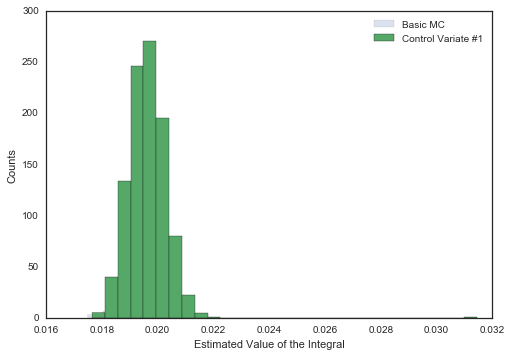

std dev of vanilla monte carlo:  0.000659056285561
std dev using control variate #1:  0.000743270594363


In [45]:
# visualize the improvement
plt.hist(sims_array, 30, alpha=0.2, label=u'Basic MC');
plt.hist(sims_array3, 30, label = u'Control Variate #1');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

print "std dev of vanilla monte carlo: ", np.std(sims_array)
print "std dev using control variate #1: ", np.std(sims_array3)

<div class="alert alert-warning">
The reason for the poor reduction in variance (and in certain cases, the variance actually increased) is that we are using a function that does not correlate well with the original function; perhaps we should consider a control variate that at least mimics the two "humps" of the original function. A <strong>bi-variate Gaussian</strong> has a bump shape, and we can take a linear combination of two of these to try to construct a function that looks similar the original over the domain of interest.
</div>

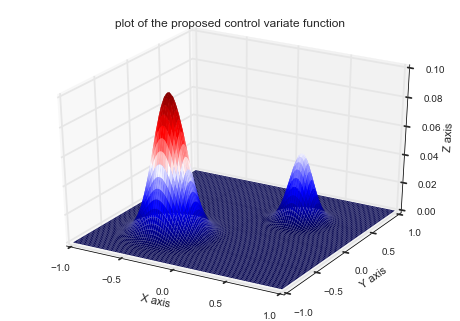

In [46]:
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)  # create grid of X, Y values
Z1 = 0.012 * plt.mlab.bivariate_normal(X, Y, sigmay=0.14, sigmax=0.14, 
                                       mux=-0.4, muy= -0.4) # shift to same center (big)
Z2 = 0.003 * plt.mlab.bivariate_normal(X, Y, sigmay=0.1, sigmax=0.1, 
                                       mux=0.4, muy= 0.4) # shift to same center (small)
Zmix = Z1 + Z2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Zmix, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.seismic)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('plot of the proposed control variate function')
plt.show()

<div class="alert alert-warning">
We tuned the parameters to get a similar looking shape, by trial and error. Although we could have probably used two identical Gaussians in this model, for this purpose we decided to fine tune the parameters so as to hopefully maximize correlation between this function and the original by adjusting the heights as well. From the plot below, we see both distributions look similar.
</div>

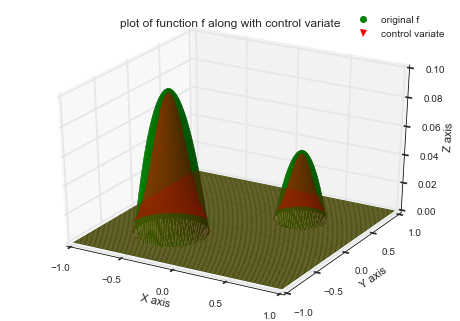

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, color="g")
ax.plot_surface(X, Y, Zmix, rstride=1, cstride=1, linewidth=0, color="r", alpha=0.3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('plot of function f along with control variate')
proxy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", color="g", marker = 'o')
proxy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", color="r", marker = 'v')
ax.legend([proxy1, proxy2], ['original f', 'control variate'], numpoints = 1)
plt.show()

In [48]:
# We define the function which we are using as a control variate
def g_gauss(x, y):
    return (0.012 * plt.mlab.bivariate_normal(x, y, sigmay=0.14, sigmax=0.14, mux=-0.4, muy= -0.4) +
            0.003 * plt.mlab.bivariate_normal(x, y, sigmay=0.1, sigmax=0.1, mux=0.4, muy= 0.4))

# simulate expected value (tau)
sims_array_tau = np.empty(N_sims) 
for i in xrange(N_sims):
    sims_array_tau[i] = calculate_f_avg(g_gauss, x_low, x_high, y_low, y_high, 100000) 
tau = np.mean(sims_array_tau)
print "Monte Carlo estimate for tau = ", tau
print "error in estimate (1 std) = ", np.std(sims_array_tau)

Monte Carlo estimate for tau =  0.00374914490039
error in estimate (1 std) =  3.71755874652e-05


In [49]:
X = np.random.uniform(low=x_low, high=x_high, size=N_total) 
Y = np.random.uniform(low=y_low, high=y_high, size=N_total)
print np.corrcoef(g_gauss(X,Y), f(X, Y))

[[ 1.          0.97772812]
 [ 0.97772812  1.        ]]


<div class="alert alert-warning">
Note that we used Monte Carlo to estimate $\tau$ as we are unable to readily derive this analytically. We note the error in this simulated estimate can be made negligible if we increase the number of samples we take for each simulation. <br><br>
We also note that these two functions are now highly correlated!
</div>

In [50]:
# domain limits and tau as set previously
sims_array4 = np.empty(N_sims)  # store estimates of simulation
start = time.time()

for i in xrange(N_sims):
    X = np.random.uniform(low=x_low, high=x_high, size=N_total) 
    Y = np.random.uniform(low=y_low, high=y_high, size=N_total)
    # using a control variate
    # compute optimal value for b
    q = np.cov(g_gauss(X, Y),f(X, Y));  
    b = -q[0,1]/np.var(g_gauss(X, Y)); 
    # evaluate formula
    sims_array4[i] = (x_high - x_low) * (y_high - y_low) * (np.mean(f(X, Y)) + b *(np.mean(g_gauss(X, Y)) - tau))
    
mean_est = np.mean(sims_array4)
error_est_5 = np.std(sims_array4)
    
timer5 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer5, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f" % error_est_5
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_5)

2.26 seconds to complete 1000 simulations

Monte Carlo estimate =  0.019631233235
error in estimate (1 std) = 0.000137
95 percent confidence interval = (0.019631 +/- 0.000268)


<div class="alert alert-warning">
We now see a significant decrease in the error for the estimate of the integral of the original function. This is further exemplified by the plot below.
</div>

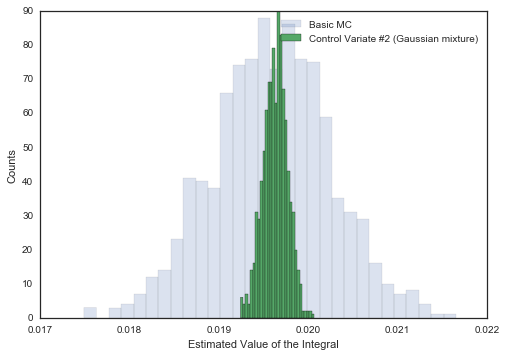

std dev of vanilla monte carlo:  0.000659056285561
std dev using Gaussian mix as control variate:  0.000136659273957


In [51]:
# visualize the improvement
plt.hist(sims_array, 30, alpha=0.2, label=u'Basic MC');
plt.hist(sims_array4, 30, label = u'Control Variate #2 (Gaussian mixture)');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

print "std dev of vanilla monte carlo: ", np.std(sims_array)
print "std dev using Gaussian mix as control variate: ", np.std(sims_array4)

### Importance Sampling

<div class="alert alert-warning">
Importance sampling can reduce the variance of our integral estimates by choosing an appropriate distribution that resembles the shape of that associated with our original function. We have the freedom to choose the PDF to use, and by choosing samples from a distribution that has a similar shape as the function being integrated, variance is reduced. Intuitively, an appropriate function allows more samples to be place where the contribution of the integrand is high, or “important.” If we can properly guess the important regions during integration, the variance of the standard Monte Carlo estimator can be significantly reduced. <br><br>

Note that we can reuse the same general form of the Gaussian mixture used in the previous section. In theory, we could have relied on a combination of two identical Gaussians since only the shape has to be similar in order to apply importance sampling (there is no correlation condition as with control variates), but we will simply use `g_gauss` (the Gaussian mix with bumps of different height) for convenience. <br><br>

However, since this is a probability distribution function, we must normalize it prior to use. We have already calculated $\tau$ for this function, so calculating the overall normalization factor is straightforward:
</div>

In [52]:
# Let A be the normalization factor for the combined Gaussians
A = (x_high - x_low) * (y_high - y_low) * tau
A

0.014996579601576278

<div class="alert alert-warning">
We also compute the normalization factor for each of the Gaussians separately for comparison (i.e. it will allow us to use the individual sampling functions provided by Numpy:
</div>

In [53]:
# calculate normalization factors for each Gaussian
gauss1 = lambda x, y: 0.012 * plt.mlab.bivariate_normal(x, y, sigmay=0.14, sigmax=0.14, mux=-0.4, muy= -0.4)
gauss2 = lambda x, y: 0.003 * plt.mlab.bivariate_normal(x, y, sigmay=0.1, sigmax=0.1, mux=0.4, muy= 0.4)
# domain limits as set previously
sims_array_gauss1 = np.empty(N_sims) 
sims_array_gauss2 = np.empty(N_sims) 
for i in xrange(N_sims):
    # Perform Monte Carlo
    sims_array_gauss1[i] = calculate_f_avg(gauss1, x_low, x_high, y_low, y_high, 100000)
    sims_array_gauss2[i] = calculate_f_avg(gauss2, x_low, x_high, y_low, y_high, 100000) 

mean_est1, mean_est2 = np.mean(sims_array_gauss1), np.mean(sims_array_gauss2)
error_est1, error_est2 = np.std(sims_array_gauss1), np.std(sims_array_gauss2)

print "Estimate of normalization factor for gauss1 = ", mean_est1 * (x_high - x_low) * (y_high - y_low)
print "error in estimate (1 std) = ", error_est1 * (x_high - x_low) * (y_high - y_low)

print "Estimate of normalization factor for gauss2 = ", mean_est2 * (x_high - x_low) * (y_high - y_low)
print "error in estimate (1 std) = ", error_est2 * (x_high - x_low) * (y_high - y_low)

# ratio of contribution to sums by volume over domain
p1 = mean_est1/(mean_est1 + mean_est2)
p2 = mean_est2/(mean_est1 + mean_est2)
print "ratio of factors = %2f : %2f" % (p1, p2)

Estimate of normalization factor for gauss1 =  0.0120026100604
error in estimate (1 std) =  0.000149362864678
Estimate of normalization factor for gauss2 =  0.00300169523425
error in estimate (1 std) =  5.08683452015e-05
ratio of factors = 0.799944 : 0.200056


<div class="alert alert-warning">
It appears the sum of the normalization factors of the individual Gaussians is indeed approximately equal to normalization factor for the function of the combined Gaussians. This is not that surprising since the areas that might be subject to "double counting" are primarily zero. What the comparison of individual normalization factors allows us to do is to draw from the individual Gaussian distributions using the functions provided by Numpy for a single bivariate Gaussian; however, to mimic sampling from the combined distribution, we sample from each individual one in the proportion calculated above (i.e. in the long term, about 80% of our samples should come from the first Gaussian).
</div>

In [54]:
def get_sample_gauss_mix(p1, N):
    # draw sample of x and y's from our combined Gaussian 
    # we can ignore amplitudes here since we only want x's and y's (we are not evaluating g(x, y) here)
    # only shape is critical (more points in the center around the mean, fewer points away from the center)
    
    # randomize selection of which Gaussian
    U = np.random.uniform(low=0, high=1, size=N)
    mask = U < p1
    notmask = U >= p1

    mean1 = [-0.4, -0.4]
    cov1 = [[0.14**2, 0], [0, 0.14**2]]

    mean2 = [0.4, 0.4]
    cov2 = [[0.10**2, 0], [0, 0.10**2]]
    
    X = np.empty(N)
    Y = np.empty(N)
    
    X1, Y1 = np.random.multivariate_normal(mean1, cov1, N).T
    X2, Y2 = np.random.multivariate_normal(mean2, cov2, N).T
    
    X[mask], Y[mask] = X1[mask], Y1[mask]
    X[notmask], Y[notmask] = X2[notmask], Y2[notmask]

    return X, Y

In [55]:
sims_array5 = np.empty(N_sims)  # store estimates of simulation
start = time.time()

for i in xrange(N_sims):
    # get samples
    X, Y = get_sample_gauss_mix(p1, N_total)
    # filter out samples not within bounds
    Xmask = (X < x_high) & (X > x_low)
    Ymask = (Y < y_high) & (Y > y_low)
    mask =  Xmask & Ymask
    X = X[mask]
    Y = Y[mask]
    # compute estimates
    sims_array5[i] = np.mean(f(X, Y)/g_gauss(X, Y))*A

mean_est = np.mean(sims_array5)
error_est_6 = np.std(sims_array5)
    
timer6 = time.time() - start
print '%0.2f seconds to complete %d simulations\n' % (timer6, N_sims)

print "Monte Carlo estimate = ", mean_est
print "error in estimate (1 std) = %0.6f" % error_est_6
print "95 percent confidence interval = (%0.6f +/- %0.6f)" % (mean_est, 1.96 * error_est_6)

2.79 seconds to complete 1000 simulations

Monte Carlo estimate =  0.019630787116
error in estimate (1 std) = 0.000073
95 percent confidence interval = (0.019631 +/- 0.000143)


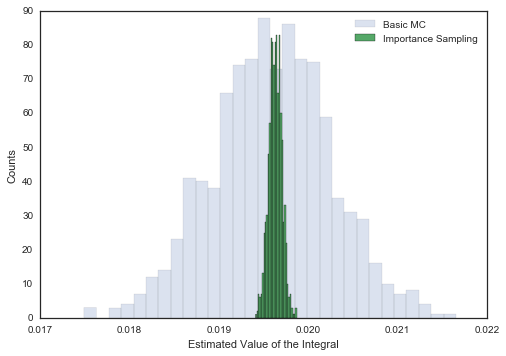

std dev of vanilla monte carlo:  0.000659056285561
std dev using importance sampling:  7.28467321784e-05


In [56]:
# visualize the improvement
plt.hist(sims_array, 30, alpha=0.2, label=u'Basic MC');
plt.hist(sims_array5, 30, label = u'Importance Sampling');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

print "std dev of vanilla monte carlo: ", np.std(sims_array)
print "std dev using importance sampling: ", np.std(sims_array5)

<div class="alert alert-warning">
We observe that the error has decreased significantly with the assistance of a function of similar shape, and using importance sampling.
</div>

### Antithetic Variates

<div class="alert alert-warning">
The use of antithetic variates can also reduce the variance in our estimate when performing Monte Carlo methods; however, the technique exploits the fact that the function being evaluated is <strong>monotonic</strong>, which is not the case here and is therefore not immediately useful. If we needed to apply this method, we could divide the function into components that are monotonic, by exploiting, for example, the symmetry of certain parts of the function, and then applying the technique to the component parts. Another possibility might be to employ the method in combination with some type of transformation, such as the inverse transform, where we can work with a CDF that will be monotonic.
</div>

### Summary Table

In [57]:
df = pd.DataFrame([[timer1, error_est_1], [timer2, error_est_2], [timer3, error_est_3], 
                   [timer5, error_est_5], [timer6, error_est_6]], 
                  index=['Basic Monte Carlo', 'Stratified Sampling', 'Improved Stratification', 
                         'Control Variates (Gaussian mix)', 'Importance Sampling'], 
                  columns=['Run time','Estimate of Error (N_sims=1000)'])
df

,Run time,Estimate of Error (N_sims=1000)
Basic Monte Carlo,0.399266,0.000659
Stratified Sampling,2.786934,0.000259
Improved Stratification,2.883152,0.000186
Control Variates (Gaussian mix),2.258928,0.000137
Importance Sampling,2.790703,0.000073


<div class="alert alert-warning">
From the table we can see that all of our variance reduction methods produced some improvement over the estimate of the error compared to the Basic Monte Carlo simulation. The two stratified sampling techniques worked pretty well (with the more targeted stratification strategy working out better), although they took longer to run as it was necessary to split the domain into many tiny sections and repeat the sampling method on each. <br><br>

The use of a control variate also improved on the error of the estimate, at least when a function that looked more similar to the one being modeled was used (the sum of two Gaussians). However, we now must sample from the control variate (which may be complex) and then evaluate two functions at points throughout the domain rather than just one. <br><br>

Finally, the importance sampling technique showed the most improvement. We took advantage of a different function that had a similar shape to the function that we were integrating when determine at what points in the domain should samples be taken from. It is not surprising, however, to have incurred a greater run time, as it was necessary to sample from the chosen function, and then to evaluate two other functions at points through the domain rather than just one. <br><br>

In general, to achieve a reduction in variance, we trade-off processing time: not surprisingly, there is no "free lunch" to be had.
</div>